In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "fitbit"

# A few words about this project

This is the Bellabeat data analysis case study, for Google Data Analytics Professional Certificate. For answering the business questions, I will follow the data analysis process: **ask, prepare, process, analyze, share and act**. 

## About Bellabeat

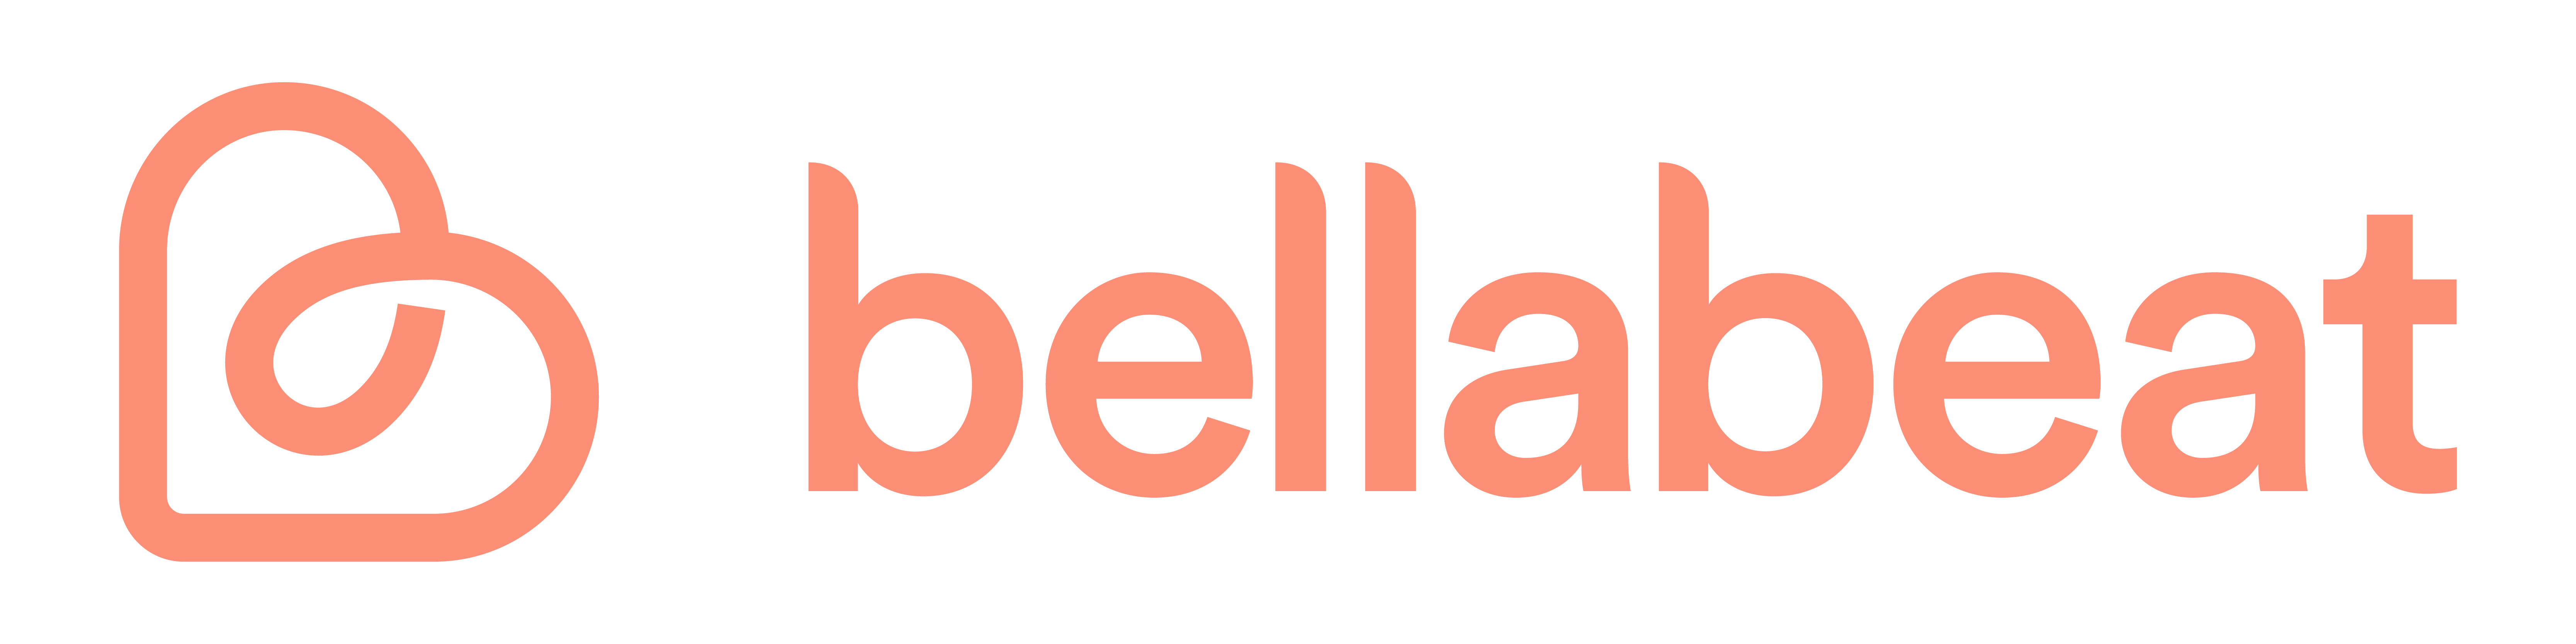

BellaBeat is a high-tech manufacturer, of health-focused products for women. Bellabeat is a small company with potentioal to grow in the smart-device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analizing smart device fitness data, could help unlock new growth oportunities for the company.



## About the Analysis

An analysis of available consumer data can highlight how people are already using their products, in order to develop data-driven marketing strategies.

What are some trends in smart device usage?
How could these trends apply to Bellabeat customers?
How could these trends help influence Bellabeat marketing strategy?

I will use the FitBit Fitness Tracker Data for our analysis.

## Loading packages 

In [2]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Loadind data

In [3]:
daily_activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_day <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
daily_intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourly_intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
daily_calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")


## Have a look at my data

In [4]:
glimpse(daily_activity)
glimpse(sleep_day)
glimpse(daily_intensities)
glimpse(weight)
glimpse(hourly_intensities)
glimpse(daily_calories)


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

# Prepare Data

In [5]:
n_distinct(sleep_day$Id)
n_distinct(daily_activity$Id)
n_distinct(daily_activity$Id)
nrow(daily_activity)
nrow(sleep_day)
daily_activity %>% 
  select(TotalSteps, 
         TotalDistance,
         SedentaryMinutes) %>% 
  summary()
sleep_day %>% 
  select(TotalSleepRecords,
         TotalMinutesAsleep,
         TotalTimeInBed) %>% 
  summary()

[1] 24

[1] 33

[1] 33

[1] 940

[1] 413

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :1440.0  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

## Finding duplicated entries

In [6]:
sum(duplicated(weight))
sum(duplicated(daily_calories))
sum(duplicated(daily_intensities))
sum(duplicated(hourly_intensities))
sum(duplicated(daily_activity))
sum(duplicated(sleep_day))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 3

## Removing the duplicated entries

In [7]:
sleep_day <- sleep_day %>%
  distinct() %>%
  drop_na()

sum(duplicated(sleep_day)) 

##We verified that the duplicates have been removed

[1] 0

## A quick view

In [8]:
weight_avg = weight %>% group_by(Id) %>% 
  summarise(Weightavg=mean(WeightKg))
View(weight_avg)
sleep_avg = sleep_day %>% group_by(Id) %>% 
  summarize(HoursInBedAvg=mean(TotalTimeInBed/60))
View(sleep_avg)
n_distinct(weight$Id)
sleep_weight<- sleep_avg %>%  inner_join(weight_avg, by="Id")
View(sleep_weight)
activity_avg = daily_activity %>% group_by(Id) %>% 
  summarise(StepsAvg=mean(TotalSteps),
            DistanceAvg=mean(TotalDistance),
            RelaxTime=mean(SedentaryMinutes)/60,
            CaloriesAvg=mean(Calories)
            )
View(activity_avg)
activitityVSsleep <- activity_avg %>%  inner_join(sleep_avg, by="Id")
View(activitityVSsleep)

Id,Weightavg
<dbl>,<dbl>
1503960366,52.60000
1927972279,133.50000
2873212765,57.00000
4319703577,72.35000
4558609924,69.64000
5577150313,90.70000
6962181067,61.55333
8877689391,85.14583


Id,HoursInBedAvg
<dbl>,<dbl>
1503960366,6.386667
1644430081,5.766667
1844505072,16.016667
1927972279,7.296667
2026352035,8.960714
2320127002,1.150000
2347167796,8.188889
3977333714,7.685714
4020332650,6.329167


[1] 8

Id,HoursInBedAvg,Weightavg
<dbl>,<dbl>,<dbl>
1503960366,6.386667,52.60000
1927972279,7.296667,133.50000
4319703577,8.366026,72.35000
4558609924,2.333333,69.64000
5577150313,7.676923,90.70000
6962181067,7.768817,61.55333


Id,StepsAvg,DistanceAvg,RelaxTime,CaloriesAvg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12116.742,7.8096774,14.13602,1816.419
1624580081,5743.903,3.9148387,20.96237,1483.355
1644430081,7282.967,5.2953334,19.36444,2811.300
1844505072,2580.065,1.7061290,20.11022,1573.484
1927972279,916.129,0.6345161,21.95699,2172.806
2022484408,11370.645,8.0841935,18.54301,2509.968
2026352035,5566.871,3.4548387,11.49032,1540.645
2320127002,4716.871,3.1877419,20.33495,1724.161
2347167796,9519.667,6.3555555,11.45278,2043.444


Id,StepsAvg,DistanceAvg,RelaxTime,CaloriesAvg,HoursInBedAvg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12116.742,7.8096774,14.13602,1816.419,6.386667
1644430081,7282.967,5.2953334,19.36444,2811.300,5.766667
1844505072,2580.065,1.7061290,20.11022,1573.484,16.016667
1927972279,916.129,0.6345161,21.95699,2172.806,7.296667
2026352035,5566.871,3.4548387,11.49032,1540.645,8.960714
2320127002,4716.871,3.1877419,20.33495,1724.161,1.150000
2347167796,9519.667,6.3555555,11.45278,2043.444,8.188889
3977333714,10984.567,7.5169999,11.79222,1513.667,7.685714
4020332650,2267.226,1.6261290,20.62097,2385.806,6.329167


The weight dataset is very small so in order to avoid bias we won't use it.

## A quick View with plots

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



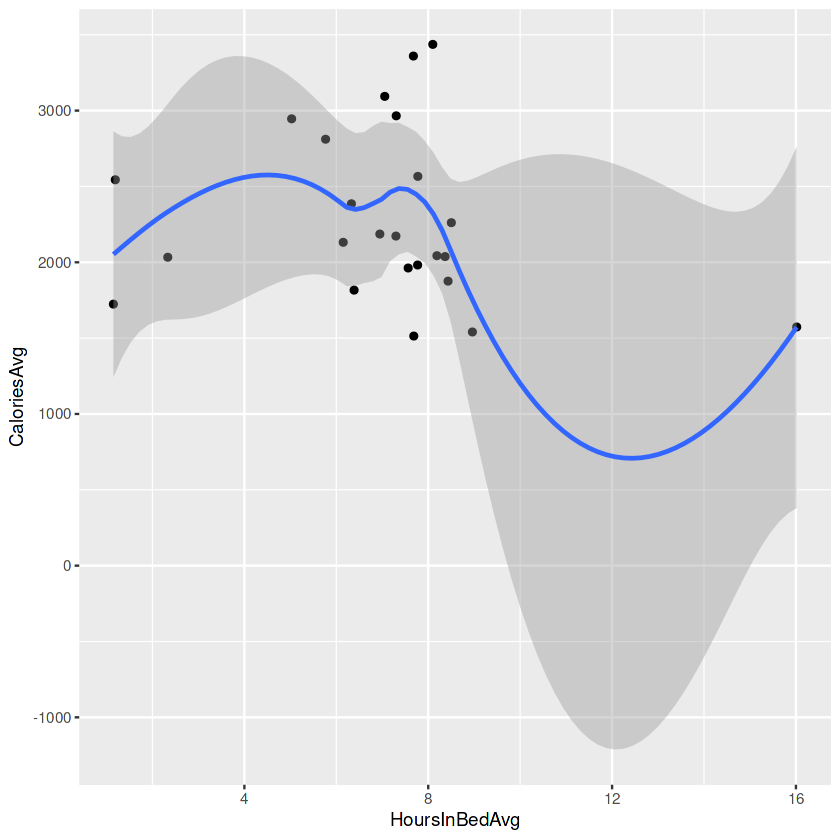

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



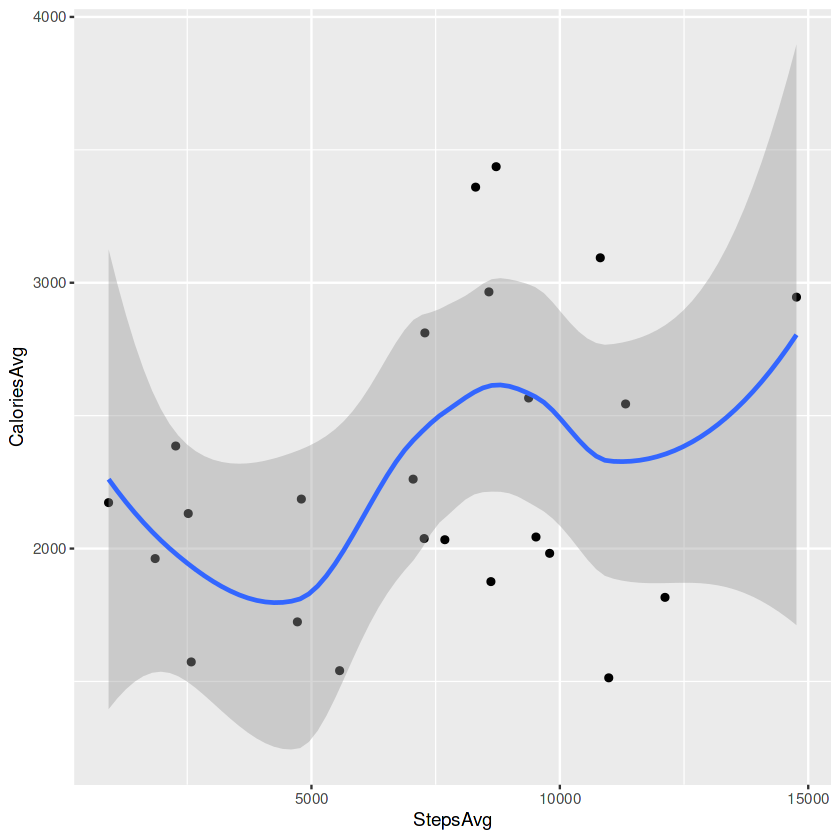

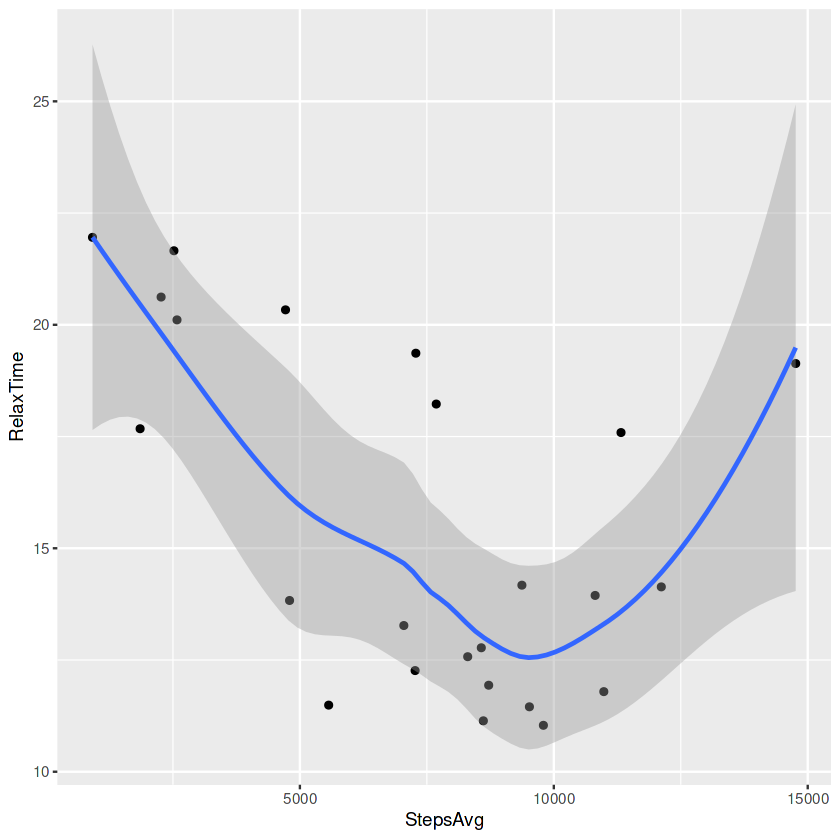

In [9]:
ggplot(data=activitityVSsleep, aes(x=HoursInBedAvg, y=CaloriesAvg)) + geom_point() + geom_smooth()
ggplot(data=activitityVSsleep, aes(x=StepsAvg, y=CaloriesAvg)) + geom_point() +geom_smooth()
ggplot(data=activitityVSsleep, aes(x=StepsAvg, y=RelaxTime)) + geom_point() + geom_smooth()


There is not strong corellation between Average Steps for each person and the Relaxing Time or the Hours In Bed and the Calories burnt for each day, but there is corellation between the the Average Steps and the Calories burnt each day as we could easily predict.

# Processing Data

## Formating hourly intensities

In [10]:
hourly_intensities$ActivityHour <- as.POSIXct(hourly_intensities$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p")
hourly_intensities$Date <- format(hourly_intensities$ActivityHour, format = "%m/%d/%Y")
hourly_intensities$Time <- format(hourly_intensities$ActivityHour, format = "%H:%M:%S")

## Formating-preparing raw data sleep and daily activity

In [11]:
daily_activity$ActivityDate <- as.POSIXct.default(daily_activity$ActivityDate, format = "%m/%d/%Y")
daily_activity$Date <- format(daily_activity$ActivityDate, format =  "%m/%d/%Y")
View(daily_activity)
View(daily_calories)
daily_calories$ActivityDay <- format(daily_calories$ActivityDay, format = "%m/%d/%Y")
daily_intensities$ActivityDay <- format(daily_intensities$ActivityDay, format = "%m/%d/%Y")

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date
<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/2016
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/2016
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/2016
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/2016
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/2016
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/2016
1503960366,2016-04-18,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921,04/18/2016
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,04/19/2016
1503960366,2016-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786,04/20/2016


Id,ActivityDay,Calories
<dbl>,<chr>,<int>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728
1503960366,4/18/2016,1921
1503960366,4/19/2016,2035
1503960366,4/20/2016,1786


In [12]:
sleep_day$SleepDay <- as.POSIXct.default(sleep_day$SleepDay, format = "%m/%d/%Y")
sleep_day$Date <- format(sleep_day$SleepDay, format = "%m/%d/%Y")
sleep_day$WeekDay <- weekdays(sleep_day$SleepDay)
sleep_day$Insomnia <- c(sleep_day$TotalTimeInBed-sleep_day$TotalMinutesAsleep)


## Building the final database for analysis

In [13]:
sleep_activity_merged <- merge(sleep_day, daily_activity, by = c("Id", "Date"))%>% 
  select(-c("SleepDay", "ActivityDate", "TotalSleepRecords"))

# Analyzing and Sharing Data

In [14]:
sleep_activity_merged %>% 
  select(TotalMinutesAsleep,
         TotalTimeInBed,
         VeryActiveMinutes,
         FairlyActiveMinutes,
         LightlyActiveMinutes,
         SedentaryMinutes,
         ) %>% 
summary()

sleep_activity_merged %>% 
  select(TotalSteps,
         Insomnia,
         VeryActiveMinutes,
         FairlyActiveMinutes,
         LightlyActiveMinutes,
         SedentaryMinutes,
         ) %>% 
  summary()

 TotalMinutesAsleep TotalTimeInBed  VeryActiveMinutes FairlyActiveMinutes
 Min.   : 58.0      Min.   : 61.0   Min.   :  0.00    Min.   :  0.00     
 1st Qu.:361.0      1st Qu.:403.8   1st Qu.:  0.00    1st Qu.:  0.00     
 Median :432.5      Median :463.0   Median :  9.00    Median : 11.00     
 Mean   :419.2      Mean   :458.5   Mean   : 25.05    Mean   : 17.92     
 3rd Qu.:490.0      3rd Qu.:526.0   3rd Qu.: 38.00    3rd Qu.: 26.75     
 Max.   :796.0      Max.   :961.0   Max.   :210.00    Max.   :143.00     
 LightlyActiveMinutes SedentaryMinutes
 Min.   :  2.0        Min.   :   0.0  
 1st Qu.:158.0        1st Qu.: 631.2  
 Median :208.0        Median : 717.0  
 Mean   :216.5        Mean   : 712.1  
 3rd Qu.:263.0        3rd Qu.: 782.8  
 Max.   :518.0        Max.   :1265.0  

   TotalSteps       Insomnia      VeryActiveMinutes FairlyActiveMinutes
 Min.   :   17   Min.   :  0.00   Min.   :  0.00    Min.   :  0.00     
 1st Qu.: 5189   1st Qu.: 17.00   1st Qu.:  0.00    1st Qu.:  0.00     
 Median : 8913   Median : 25.50   Median :  9.00    Median : 11.00     
 Mean   : 8515   Mean   : 39.31   Mean   : 25.05    Mean   : 17.92     
 3rd Qu.:11370   3rd Qu.: 40.00   3rd Qu.: 38.00    3rd Qu.: 26.75     
 Max.   :22770   Max.   :371.00   Max.   :210.00    Max.   :143.00     
 LightlyActiveMinutes SedentaryMinutes
 Min.   :  2.0        Min.   :   0.0  
 1st Qu.:158.0        1st Qu.: 631.2  
 Median :208.0        Median : 717.0  
 Mean   :216.5        Mean   : 712.1  
 3rd Qu.:263.0        3rd Qu.: 782.8  
 Max.   :518.0        Max.   :1265.0  

## Checking for insomnia problems

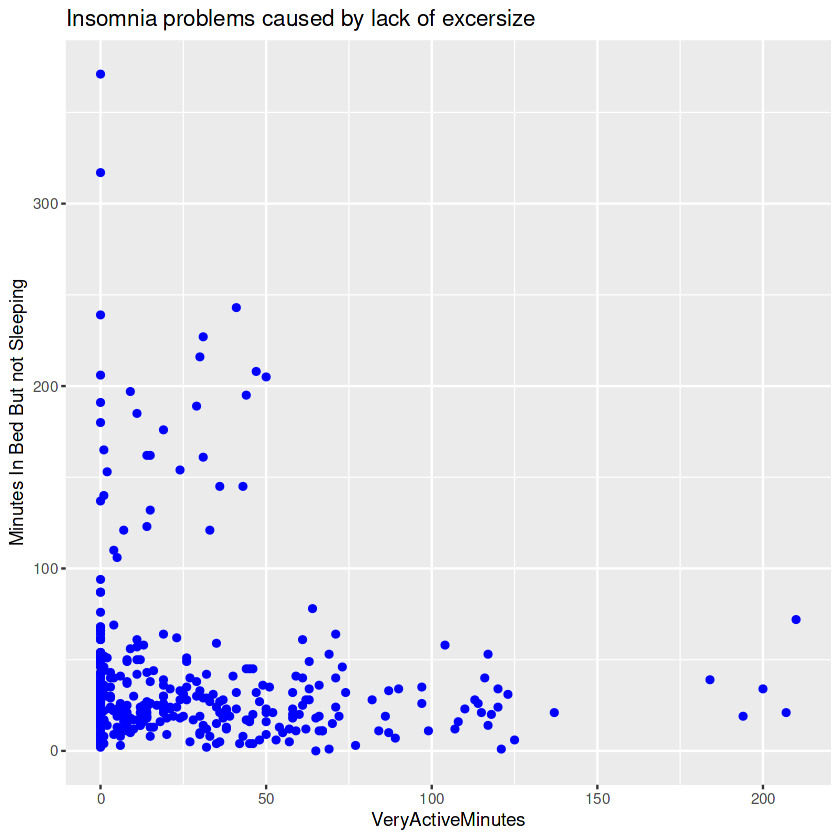

In [15]:
ggplot(sleep_activity_merged, aes(x = VeryActiveMinutes, y = Insomnia)) + geom_point(color = "Blue") +
  ylab("Minutes In Bed But not Sleeping") +
  ggtitle("Insomnia problems caused by lack of excersize")


As we can see people that lacks of excersize can have insomnia problems and have sleeping problems.

## Intensities per Hour of the day

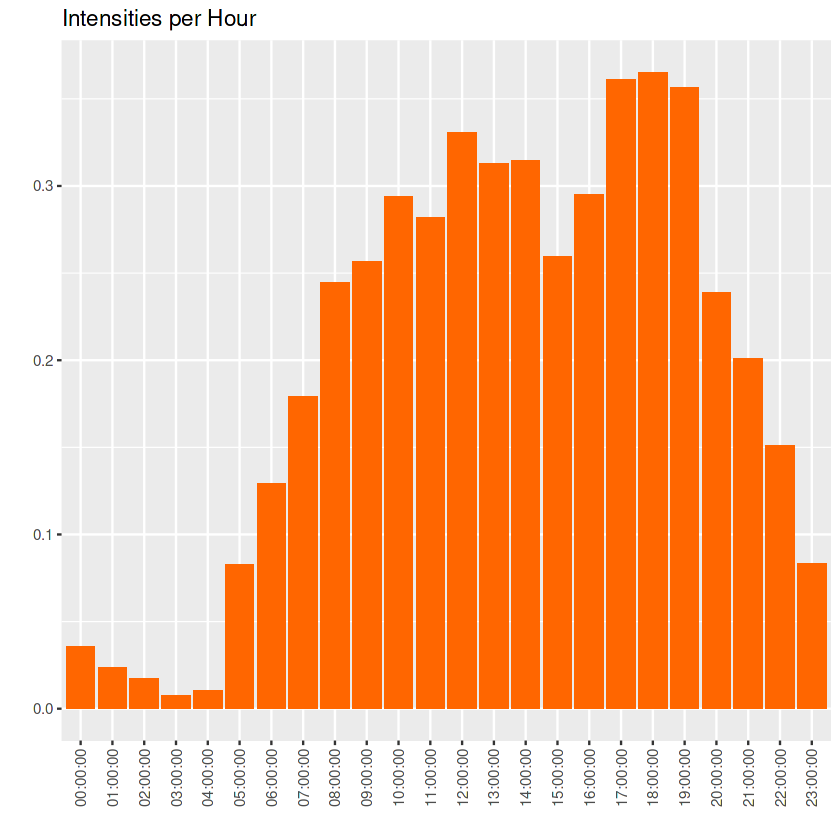

In [16]:
hourly_intensities_avg <- hourly_intensities %>% 
  group_by(Time) %>% 
  summarize(intensity_per_hour = mean(AverageIntensity))

ggplot(hourly_intensities_avg) +
  geom_col(mapping = aes(x = Time , y = intensity_per_hour) , fill = "#ff6600") +
  labs(title = "Intensities per Hour", x = "", y = "") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))


From this plot, the most active hours of the day is 12:00 to 14:00 and 17:00 to 19:00. Generally 12:00 to 14:00 are working hours so the most intensive part of the day, that means that the hours that people excersice are from 17:00 until 19:00

### Sort WeekDays

In [17]:
sleep_activity_merged$WeekDay <- ordered(sleep_activity_merged$WeekDay, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
                                                                              "Friday", "Saturday", "Sunday"))

## Plots

### Steps per Weekday

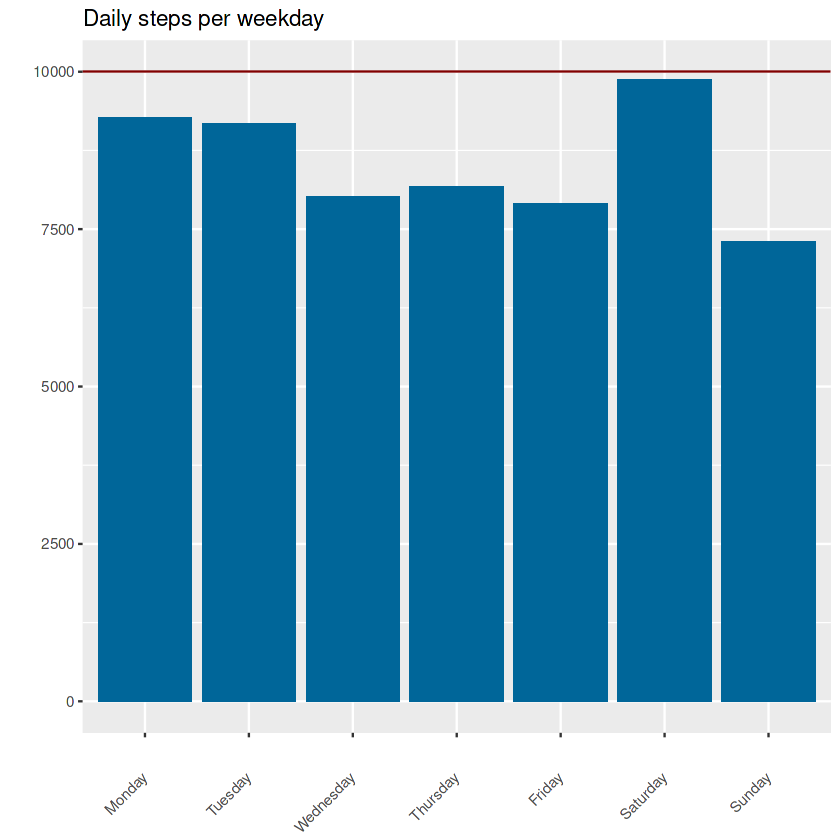

In [18]:
sleep_activity_merged <- sleep_activity_merged%>%
  group_by(WeekDay) %>%
  summarize (daily_steps = mean(TotalSteps), daily_sleep = mean(TotalMinutesAsleep))
  
ggplot(sleep_activity_merged) +
  geom_col(mapping = aes(x = WeekDay, y = daily_steps), fill = "#006699") +
  geom_hline(yintercept = 10000, color = "#800000")+
  labs(title = "Daily steps per weekday", x = "", y = "")+
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 1))

From this bar graph, we can conclude that people walk less than 10.000 steps per day, which is the recommended numbers of steps by CDC. The most "lazy" day is sunday and the more "active" is saturday.

 ### Sleep per Weekday

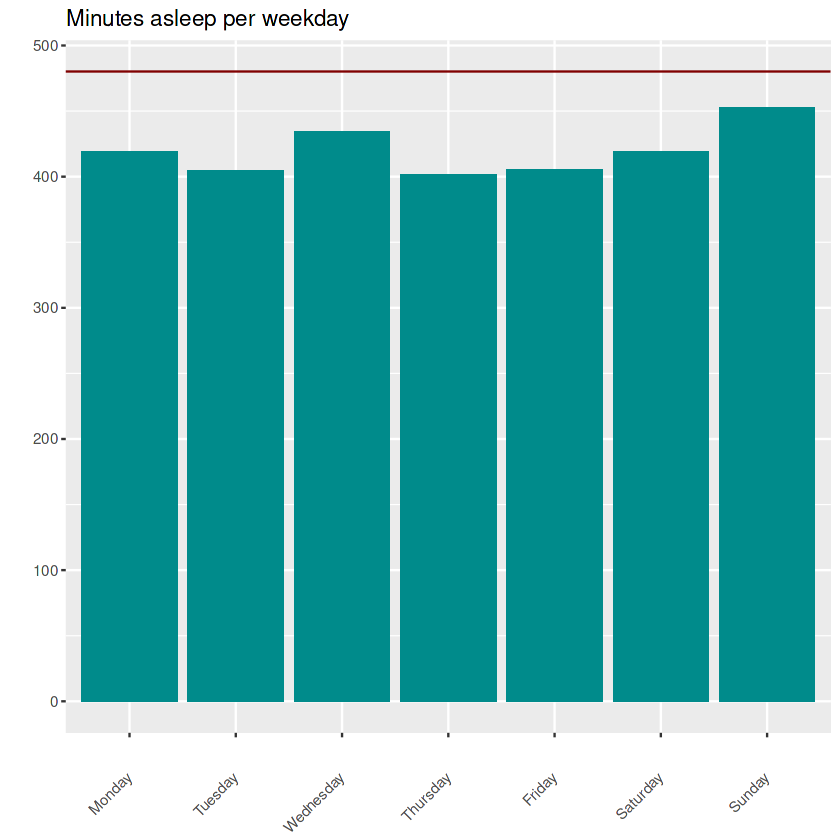

In [19]:
ggplot(sleep_activity_merged) +
  geom_col(mapping = aes(x = WeekDay, y = daily_sleep), fill = "#008b8b") +
  geom_hline(yintercept = 480, color ="#800000") +
  labs(title = "Minutes asleep per weekday", x = "",y = "") +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 1))

As we can see, the average sleeping hours is bellow the recommended slepping hours by CDC which are about 8 hours per day. The day that people sleeps more hours is sunday.

# Conclusions

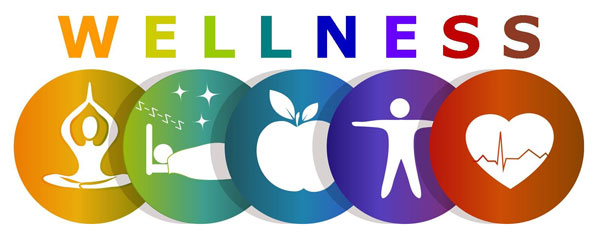

* The more the excersize the more calories you burn and probably minimize sleeping problems
* The most active day of the day is saturday and the less is sunday
* The most active hours of the day is from 17:00 to 19:00

## And actions

* Bellabeat can target people with over-weight issues and sleeping problems as future customers, and a way to improve their lives using the leaf smart-device product with the bellabeat application.
* Collecting data measurments from the step tracker, can set a minimum goal for each user for the 10.000 steps per day and use a reward of something digital in the app when achieving this goal.
* Collenting data about the time each person get up in the morning, can set the latest time that must fall asleep in order to achieve the 8 hour minimum sleep each day.
* Can also calculate the calories that in average each person burns, using intensities measurments, using this data for weight loss.
* Finally every day a bit earlier from 17:00 o'clock, can send a notification for everyday excersize, to give a little push for people to get excersize it their everyday life.